## Norman 2022 dataset - makes no sense

In [3]:
import scanpy as scp
import pandas as pd
import numpy as np

Read-in bulk data. Apparently should be used as a reference for perturbations

In [128]:
bulk_raw = scp.read_h5ad('./data/K562_essential_normalized_bulk_01.h5ad')

In [129]:
bulk_raw.var[bulk_raw.var.gene_name == gene]

,gene_name,mean,std,cv,in_matrix,gini,clean_mean,clean_std,clean_cv
gene_id,,,,,,,,,
ENSG00000110104,CCDC86,0.701475,0.175006,0.249483,True,0.137211,0.749281,0.17782,0.237321


In [130]:
bulk_raw.var[bulk_raw.var.gene_name==gene]

,gene_name,mean,std,cv,in_matrix,gini,clean_mean,clean_std,clean_cv
gene_id,,,,,,,,,
ENSG00000110104,CCDC86,0.701475,0.175006,0.249483,True,0.137211,0.749281,0.17782,0.237321


Read-in scRNAseq data with perturbations. As the first step we want to explore what happens when perturbing gene CCDC86, then will see...

In [131]:
ss_norm = scp.read_h5ad('./data/K562_essential_normalized_singlecell_01.h5ad')

In [132]:
gene = 'CCDC86'
gene_id = 'ENSG00000110104'
gene_id2 = 'ENSG00000188976'

We take all the cells where this gene is perturbed and running AD test to see whether it is within the distribution or not. Where is the reference???

In [123]:
cells = ss_norm.obs[ss_norm.obs.gene == gene].index

In [124]:
counts = []
for c in cells:
    counts.extend(ss_norm[c, gene_id].obs.core_adjusted_UMI_count.values)

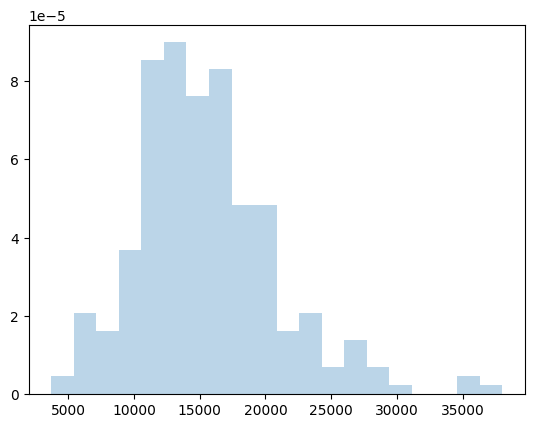

In [126]:
import matplotlib.pyplot as plt
plt.hist(counts,bins=20,alpha=0.3,density=True);

In [122]:
np.mean(counts), np.mean(counts2)

(15461.816, 14927.192)

## Norman 2019 Science dataset - makes sense

In [1]:
from gears import PertData, GEARS
from gears.utils import dataverse_download

In [2]:
## Download dataloader from dataverse
dataverse_download('https://dataverse.harvard.edu/api/access/datafile/6979957', 'norman_umi_go.tar.gz')

## Extract and set up dataloader directory
import tarfile
with tarfile.open('norman_umi_go.tar.gz', 'r:gz') as tar:
    tar.extractall()

Downloading...
100%|██████████████████████████████████████████████████████████████| 1.10G/1.10G [04:42<00:00, 3.87MiB/s]


In [6]:
df = scp.read_h5ad('./data/Norman_2019/norman_umi_go/perturb_processed.h5ad')

In [104]:
df.var.loc[df.uns['top_non_zero_de_20']['K562_FOXA3+ctrl_1+1']].values.squeeze()

array(['LYZ', 'GAL', 'FOXA3', 'GYPB', 'FTH1', 'PTMA', 'OAZ1', 'RANBP1',
       'MT-CO1', 'KRT8', 'ALAS2', 'TEX30', 'SEC61G', 'FABP5', 'RAN',
       'PRSS57', 'STAT5A', 'FKBP4', 'SMYD3', 'PSMB9'], dtype=object)

In [59]:
treat_cells = df.obs[df.obs.condition=='FOXA3+ctrl'].index

In [12]:
df.obs.condition_name.unique()

['K562_TSC22D1+ctrl_1+1', 'K562_KLF1+MAP2K6_1+1', 'K562_ctrl_1', 'K562_CEBPE+RUNX1T1_1+1', 'K562_MAML2+ctrl_1+1', ..., 'K562_STIL+ctrl_1+1', 'K562_CDKN1C+ctrl_1+1', 'K562_ctrl+CDKN1B_1+1', 'K562_CDKN1B+CDKN1A_1+1', 'K562_C3orf72+FOXL2_1+1']
Length: 284
Categories (284, object): ['K562_AHR+FEV_1+1', 'K562_AHR+KLF1_1+1', 'K562_AHR+ctrl_1+1', 'K562_ARID1A+ctrl_1+1', ..., 'K562_ctrl+UBASH3B_1+1', 'K562_ctrl+ZBTB1_1+1', 'K562_ctrl+ZBTB25_1+1', 'K562_ctrl_1']

In [48]:
ctrl_cells = df.obs[df.obs.condition=='ctrl'].index

In [63]:
from tqdm import tqdm

In [179]:
treat = np.zeros(shape=(len(treat_cells),5054),dtype=np.float32)
counter=0
for cell in tqdm(treat_cells):
    a = df[cell].X.toarray()
    treat[counter, :] = a
    counter+=1
#treat_summa/=counter
treat_mean = np.median(treat, axis=0)
treat_std = np.std(treat, axis=0)

100%|█████████████████████████████████████████████████████████████████| 409/409 [00:01<00:00, 338.64it/s]


In [180]:
ctrl = np.zeros(shape=(len(ctrl_cells),5054),dtype=np.float32)
counter=0
for cell in tqdm(ctrl_cells):
    a = df[cell].X.toarray()
    ctrl[counter, :] = a
    counter+=1
#treat_summa/=counter
ctrl_mean = np.median(ctrl, axis=0)
ctrl_std = np.std(ctrl, axis=0)

100%|███████████████████████████████████████████████████████████████| 7353/7353 [00:19<00:00, 368.46it/s]


In [118]:
non_zero_DE = ['LYZ', 'GAL', 'FOXA3', 'GYPB', 'FTH1', 'PTMA', 'OAZ1', 'RANBP1',
                'MT-CO1', 'KRT8', 'ALAS2', 'TEX30', 'SEC61G', 'FABP5', 'RAN',
                'PRSS57', 'STAT5A', 'FKBP4', 'SMYD3', 'PSMB9']

In [146]:
import matplotlib.pyplot as plt

In [183]:
ctrl_mean_f = ctrl_mean[(ctrl_mean!=0) & (treat_mean!=0)]
treat_mean_f = treat_mean[(ctrl_mean!=0) & (treat_mean!=0)]

ctrl_std_f = ctrl_std[(ctrl_mean!=0) & (treat_mean!=0)]
treat_std_f = treat_std[(ctrl_mean!=0) & (treat_mean!=0)]

genes = df.var.loc[(ctrl_mean!=0) & (treat_mean!=0)].values.squeeze()


In [185]:
of_interest = np.argsort(abs(ctrl_mean_f-treat_mean_f)/ctrl_mean_f)[-20:]

In [186]:
genes[of_interest]

array(['MDK', 'SMYD3', 'PSAP', 'MLXIP', 'SMAP2', 'BCL2L1', 'PLD3',
       'UCHL5', 'AKT1S1', 'CD59', 'EMC8', 'GAL', 'FAM210B', 'ATF7IP2',
       'LBR', 'GMPPA', 'TRAPPC6A', 'KRT8', 'GYPE', 'TSPAN13'],
      dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'MDK'),
  Text(1, 0, 'SMYD3'),
  Text(2, 0, 'PSAP'),
  Text(3, 0, 'MLXIP'),
  Text(4, 0, 'SMAP2'),
  Text(5, 0, 'BCL2L1'),
  Text(6, 0, 'PLD3'),
  Text(7, 0, 'UCHL5'),
  Text(8, 0, 'AKT1S1'),
  Text(9, 0, 'CD59'),
  Text(10, 0, 'EMC8'),
  Text(11, 0, 'GAL'),
  Text(12, 0, 'FAM210B'),
  Text(13, 0, 'ATF7IP2'),
  Text(14, 0, 'LBR'),
  Text(15, 0, 'GMPPA'),
  Text(16, 0, 'TRAPPC6A'),
  Text(17, 0, 'KRT8'),
  Text(18, 0, 'GYPE'),
  Text(19, 0, 'TSPAN13')])

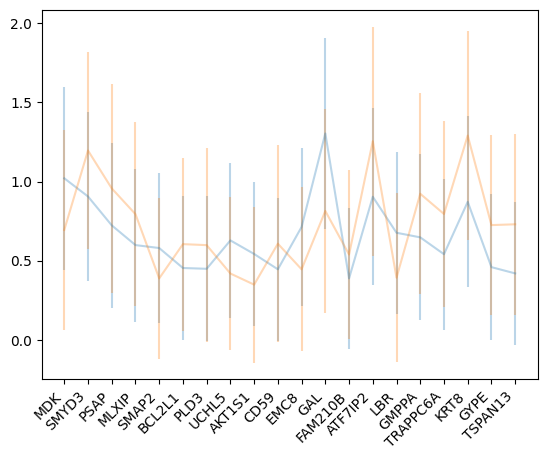

In [187]:
plt.errorbar(x=genes[of_interest], y=ctrl_mean_f[of_interest], yerr=ctrl_std_f[of_interest], alpha=0.3)
plt.errorbar(x=genes[of_interest], y=treat_mean_f[of_interest], yerr=treat_std_f[of_interest], alpha=0.3)
plt.xticks(rotation=45, ha='right')

In [136]:
summa_den = summa.copy()
summa_den[summa_den==0] = treat_summa[summa_den==0]
disc_DE = df.var.iloc[np.argsort(abs(treat_summa-summa_den)/(1+summa_den))[0,-20:].squeeze()].values.squeeze().tolist()

In [137]:
disc_DE

['TAF1A',
 'ETS2',
 'HSPA1B',
 'CRYBA2',
 'NFASC',
 'CCDC109B',
 'CENPV',
 'PNMT',
 'S100A10',
 'UBASH3B',
 'FAM101B',
 'LST1',
 'MT1G',
 'IL32',
 'TBX2',
 'UPP1',
 'MS4A3',
 'PSMB9',
 'HEPACAM2',
 'TFF3']

In [138]:
set(disc_DE).intersection(set(non_zero_DE))

{'PSMB9'}

In [39]:
df['AAACCTGAGGCATGTG-1','ENSG00000187634'].uns

{'hvg': {'flavor': 'seurat'},
 'non_dropout_gene_idx': {'K562_AHR+FEV_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_AHR+KLF1_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_AHR+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_ARID1A+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_ARRDC3+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_ATL1+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_BAK1+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_BCL2L11+BAK1_1+1': array([   0,    1,    3, ..., 5051, 5052, 5053]),
  'K562_BCL2L11+TGFBR2_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_BCL2L11+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_BCORL1+ctrl_1+1': array([   0,    1,    2, ..., 5051, 5052, 5053]),
  'K562_BPGM+SAMD1_1+1': array([   0,    1,    3, ..., 5051, 5052, 5053]),
  'K562_BPGM+ZBTB1_1+1': array([   0,    1, 